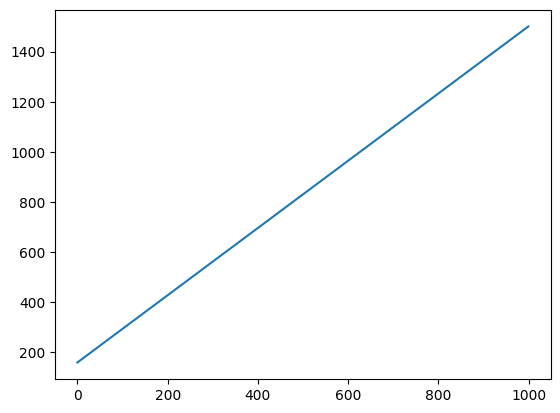

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from scipy.optimize import root_scalar

p_relax_init = 0.8
decay_init = 0.995
episode_len = 1500

n_episodes = 1000

values = np.linspace(
    sum(p_relax_init * decay_init ** np.arange(episode_len)), episode_len, n_episodes
)


p_values = p_relax_init + np.linspace(0, 1, n_episodes) * (1.0 - p_relax_init)
decay_values = []
for p, v in zip(p_values, values):
    decay = root_scalar(
        lambda x: sum(x**t for t in range(episode_len)) - v / p,
        bracket=[0.0, 1.0],
        method="brentq",
    ).root
    decay_values.append(decay)

plt.plot(
    [
        sum(p * decay ** np.arange(episode_len))
        for p, decay in zip(p_values, decay_values)
    ]
)
plt.show()